In [27]:
from processing_utils import * 
import matplotlib.pyplot as plt

In [9]:
def _get_labeled_datasets_generator_train(path_list,image_dim, preprocess=False,method=tf.image.ResizeMethod.GAUSSIAN):
    labels=[]
    images=[]
    onehot=OneHotEncoder(path_list)
    for path in path_list:
        path_images=[np.array(img['image']) for img in load_dataset(path,split="train") if img['split']=='train']
        path_labels=[onehot(path) for _ in path_images]
        images+=path_images
        labels+=path_labels
    if preprocess:
        image_function=get_preprocess_image_train(image_dim,method)
    else:
        image_function=get_normalize(image_dim,method)
    label_generator=get_basic_generator(labels)
    image_generator=get_basic_generator([image_function(img) for img in images])
    image_dataset = tf.data.Dataset.from_generator(image_generator, output_signature=tf.TensorSpec(shape=(image_dim,image_dim,3), dtype=tf.float32))
    label_dataset=tf.data.Dataset.from_generator(label_generator, output_signature=tf.TensorSpec(shape=(len(path_list)), dtype=tf.float32))
    return tf.data.Dataset.zip((image_dataset, label_dataset))

In [20]:
path_list=["jlbaker361/flickr_humans_10k","jlbaker361/anime_faces_10k"]

In [21]:
dataset=_get_labeled_datasets_generator_train(image_dim=64,path_list=path_list)

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 30.61it/s]


Dataset parquet downloaded and prepared to /home/jlb638/.cache/huggingface/datasets/jlbaker361___parquet/jlbaker361--flickr_humans_10k-026d26f47d29b0b0/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 49.30it/s]


Dataset parquet downloaded and prepared to /home/jlb638/.cache/huggingface/datasets/jlbaker361___parquet/jlbaker361--anime_faces_10k-a791da8cb9bea39e/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


In [22]:
label_dict={}

In [23]:
for (img,label) in dataset:
    key=str(label)
    if key not in label_dict:
        label_dict[key]=0
    label_dict[key]+=1

In [45]:
label_dict

{'tf.Tensor([1. 0.], shape=(2,), dtype=float32)': 9000,
 'tf.Tensor([0. 1.], shape=(2,), dtype=float32)': 9000}

In [46]:
dataset=dataset.shuffle(10000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([1. 0.], shape=(2,), dtype=float32)


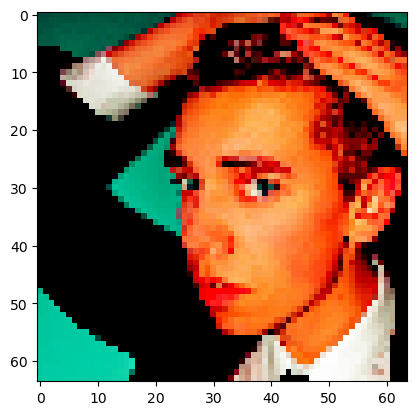

In [48]:
(img,label)=next(iter(dataset))
plt.imshow(img)
print(label)